<div style="display:block" direction=rtl align=right><br><br>
    <div  style="width:100%;margin:100;display:block"  display=block align=center>
        <img width=130 align=right src="https://i.ibb.co/yXKQmtZ/logo1.png" style="margin:0;" />
        <img width=170 align=left  src="https://i.ibb.co/wLjqFkw/logo2.png" style="margin:0;" />
        <span><br><font size=5>University of Tehran , school of ECE</font></span>
        <span><br><font size=3>Data Analytics Course</font></span>
        <span><br><font size=3>Homework 3</font></span>
    </div><br><br><br>
    <div style="display:block" align=left display=block> 
        <font size=3>Zahra Mohaghegh Rad - 810199260</font><br>
        <hr />
    </div>
</div>

ابتدا كتابخانه‌های مورد نظر را اضافه می‌كنيم:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
from persiantools.jdatetime import JalaliDate 
import matplotlib.dates as mdates

ديتاست مورد نظر را لود كرده و ستون‌های اضافی که کاربردی برای ما ندارند را حذف می‌کنیم تا حجم دیتا کاهش یابد. از جمله ستون‌هایی که حذف شده‌اند عبارتند از:
- cardiovasc_death_rate 
- diabetes_prevalence  
- female_smokers
- aged_65_older
- ... 

In [2]:
data = pd.read_csv('owid-covid-data.csv')
data.drop(data.iloc[:, 17:34], axis =1, inplace = True)
data.drop(['cardiovasc_death_rate', 'diabetes_prevalence', 'female_smokers', 'male_smokers','aged_65_older',
          'aged_70_older', 'excess_mortality_cumulative_absolute', 'excess_mortality_cumulative', 'excess_mortality', 'excess_mortality_cumulative_per_million',],
          axis =1, inplace = True)
data[data.date<'2020-10-10'] =data[data.date<'2020-10-10'].fillna(0)
data.total_vaccinations.fillna(method = "ffill", inplace =True)
data.head(5)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,stringency_index,population,population_density,median_age,gdp_per_capita,extreme_poverty,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,0.0,0.0,0.0,0.0,...,8.33,39835428.0,54.422,18.6,1803.987,0.0,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,0.0,0.0,0.0,0.0,...,8.33,39835428.0,54.422,18.6,1803.987,0.0,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,0.0,0.0,0.0,0.0,...,8.33,39835428.0,54.422,18.6,1803.987,0.0,37.746,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,0.0,0.0,0.0,0.0,...,8.33,39835428.0,54.422,18.6,1803.987,0.0,37.746,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,0.0,0.0,0.0,0.0,...,8.33,39835428.0,54.422,18.6,1803.987,0.0,37.746,0.5,64.83,0.511


# بخش اول - بررسی کرونا در ایران

<font color=red size=5 id="t1"> سوال 1</font>

طبق آنچه در صورت سوال خواسته شده است، دیتای مربوط به ایران را جدا می‌کنیم. سپس ستون‌های new_cases، new_deaths و new_vaccinations را تمیز می‌کنیم. دو ستون new_cases، new_deaths هیچ مقدار NaN نداشته و فقط ستون new_vaccinations دارای 623 مقدار NaN می‌باشد، که ستون‌هایی که قبل از تاریخ '08-02-2021' با استفاده از ```()fillna``` برابر 0 قرار دادیم، زیرا تا قبل از این تاریخ، هنوز واکسیناسیون در کشور ما شروع نشده بود. بقیه سطرهای بعد از این تاریخ را با استفاده از همین تابع و روش ```ffill```  پر می‌کنیم. در قدم بعدی با استفاده از توابع ```()groupby``` و ```()Grouper```  و چون می‌خواهیم به صورت هفتگی محاسبه کنیم، پارامتر ```freq = w``` قرار می‌دهیم و مجموع را بر روی سه ستون new_cases، new_deaths و new_vaccinations به دست می‌آوریم. برای رسم نمودار نیز از کتابخانه plotly استفاده شده است. به منظور نشان دادن تاریخ در نمودار به صورت شمسی، ```calender = persian``` قرار دادیم. هفته آخر نیز چون داده مراحل و خروجی نمودار به شرح زیر می‌باشد: 

In [6]:
df_ir = data[data.location == 'Iran'].copy()
df_ir.loc[df_ir.date < '2021-02-08', 'new_vaccinations'] = df_ir.new_vaccinations.fillna(0)
df_ir['new_vaccinations'] = df_ir.new_vaccinations.fillna(method = 'ffill')
df_ir.tail(2)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,stringency_index,population,population_density,median_age,gdp_per_capita,extreme_poverty,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
56614,IRN,Asia,Iran,2021-11-07,5987814.0,7554.0,9025.143,127299.0,126.0,142.286,...,NaN,85028760.0,49.831,32.4,19082.62,0.2,NaN,1.5,76.68,0.783
56615,IRN,Asia,Iran,2021-11-08,5996155.0,8341.0,8808.571,127439.0,140.0,140.429,...,NaN,85028760.0,49.831,32.4,19082.62,0.2,NaN,1.5,76.68,0.783


In [7]:
df_ir['date'] = pd.to_datetime(df_ir['date']) - pd.to_timedelta(7, unit='d')
df = df_ir.groupby([pd.Grouper(key='date', freq='W')])['new_cases', 'new_deaths', 'new_vaccinations'].sum().reset_index()
df.date = df.date.astype(str)
df

<ipython-input-7-d6c179c3b729>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df = df_ir.groupby([pd.Grouper(key='date', freq='W')])['new_cases', 'new_deaths', 'new_vaccinations'].sum().reset_index()


,date,new_cases,new_deaths,new_vaccinations
0,2020-02-16,43.0,8.0,0.0
1,2020-02-23,935.0,46.0,0.0
2,2020-03-01,5588.0,140.0,0.0
3,2020-03-08,7372.0,530.0,0.0
4,2020-03-15,7700.0,961.0,0.0
...,...,...,...,...
86,2021-10-10,81925.0,1483.0,11942616.0
87,2021-10-17,76029.0,1148.0,11942616.0
88,2021-10-24,63794.0,1080.0,11942616.0
89,2021-10-31,63176.0,996.0,11942616.0


In [178]:
# Create traces
fig = go.Figure()
fig.add_trace(go.Scatter(x=df.date, y=df.new_deaths,
                    mode='lines',
                    name='death'))
fig.add_trace(go.Scatter(x=df.date, y=df.new_cases,
                    mode='lines',
                    name='cases'))
fig.add_trace(go.Scatter(x=df.date, y=df.new_vaccinations,
                    mode='lines', name='vaccination'))


fig.update_layout(
    title='Number of cases and deaths and vaccination per week',
    xaxis = dict(
        title='Date(Month)',
        titlefont_size=16,
        tickfont_size=12,
        nticks=23,
        calendar='persian'
        
    ),
    yaxis=dict(
        title='Number',
        titlefont_size=16,
        tickfont_size=14,
        showgrid=False
    )
)


fig.add_vrect(x0="1400-08-09", x1="1400-08-17", 
              annotation_text="decline", annotation_position="top left",
              fillcolor="green", opacity=0.25, line_width=0)
fig.show()

In [179]:
# Create traces
fig = go.Figure()
fig.add_trace(go.Scatter(x=df.date, y=df.new_deaths,
                    mode='lines',
                    name='death'))
fig.add_trace(go.Scatter(x=df.date, y=df.new_cases,
                    mode='lines',
                    name='cases'))


fig.update_layout(
    title='Number of cases and deaths per week',
    xaxis = dict(
        title='Date(Month)',
        titlefont_size=16,
        tickfont_size=12,
        nticks=23,
        calendar='persian'
        
    ),
    yaxis=dict(
        title='Number',
        titlefont_size=16,
        tickfont_size=14,
        showgrid=False
    )
)

fig.add_vrect(x0="1400-08-09", x1="1400-08-17", 
              annotation_text="decline", annotation_position="top left",
              fillcolor="green", opacity=0.25, line_width=0)

fig.show()

نمودار دوم به این دیل ترسیم شده است که در نمودار اول توزیع مقدار مبتلایان و مرگ و میر به خوبی مشخص نبود، زیرا scale تعداد افراد واکسینه شده زیاد می‌باشد و دو نمودار دیگر به خوبی نمایش داده نمی‌شوند.



<font color=green size=5 id="t1"> تحلیل نمودار تعداد مبتلایان، فوتی‌ها و واکسیناسیون</font>

در نمودار بالا که از اسفند 1398 تا آبان 1400 را نمایش می‌دهد، در نمودا مبتلایان شاهد 4 پیک هستیم که پیک اول بین ماه‌های فروردین و اردیبهشت 1399 می‌باشد، پیک دوم از مهر 1399 تا تقریبا دی ماه 1399 می‌باشد که البته فاصله زمانی تقریبا زیادی با پیک قبلی دارد و به این دلیل می‌باشد که در سال و ماه‌های اول شروع کرونا رعایت پروتکل‌ها توسط مردم بیشتر بود. پیک سوم نیز بین ماه‌های فروردین 1400 و خرداد 1400 می‌باشد و پیک آخر نیز از تیر ماه 1400 شروع شده و تقریبا تا مهرماه 1400 ادامه داشته است. همانطور که می‌بینیم هم فاصله زمانی این پیک‌های آخر، خیلی به هم نزدیک می‌باشد و هم تعداد افرادی که در این پیک‌ها مبتلا شده‌اند خیلی بیشتر می‌باشد و این به دلیل کم شدن رعایت پروتکل‌ها و نیز جهش‌های ویروس کرونا می‌باشد. همانطور که قابل مشاهده می‌باشد، هر زمان که در نمودار مبتلایان پیک داشتیم، در نمودار مرگ و میر نیز پیک داشته‌ایم، اما خوب در مقایسه با تعداد مبتلایان میزان آن کمتر می‌باشد. اما اندازه پیک موجود در نمودار مرگ و میر متناسب با اندازه پیک مبتلایان می‌باشد، به عبارتی هرگاه که تعداد بیشتری مبتلا شده‌اند در یک پیک، متناسب با آن تعداد مرگ و میر نیز بیشتر بوده‌است. نمودار واکسیناسیون نیز همانطور که قابل مشاهده می‌باشد، در روزهای اولیه سرعت بسیار پایینی داشته است، اما تقریبا از شهریور 1400 به بعد سرعت بسیار زیادی گرفته، اما هنوز نمی‌توان ارتباط این نمودار با نمودارهای مرگ و میر و ابتلا را بررسی کرد، زیرا هنوز در مراحل اولیه واکسیناسیون هستیم و به درصد ایمنی 70% نرسیده‌ایم.اما تقریبا می‌توان گفت که در همین مدت محدودی که واکسیناسیون سرعت گرفته، نرخ مبتلایان و مرگ و میر کاهش یافته است، یعنی همانطور که مشاهده می‎کنیم از پیک آخر خارج شده‌ایم. 
همانطور که قابل مشاهده می‌باشد، هفته آخر به دلیل اینکه هنوز کامل نشده بود، آن را به صورت متمایزی و با یک کادر سبز رنگ نشان داده‌ایم.



 <hr/>
<font color=red size=5 id="t1"> سوال 2</font>

به منظور نشان دادن روند سخت‌گیری در حوزه کرونا در ایران از ستون stringency_index استفاده شده است. این ستون شاخص سخت‌گیری واکنش دولت: اندازه‌گیری ترکیبی بر اساس 9 شاخص از جمله تعطیلی مدارس، تعطیلی محل کار و ممنوعیت سفر، که به مقدار 0 تا 100 تغییر مقیاس داده شده است (100 = دقیق ترین پاسخ). روند سختگیری در ایران به شرح زیر می‌باشد: 

In [10]:
fig_2 = go.Figure()
fig_2.add_trace(go.Scatter(x=df_ir.date, y=df_ir.stringency_index,
                    mode='lines',
                    name='death'))

fig_2.update_layout(
    title='stringency trend in Iran',
    xaxis = dict(
        title='Date(Month)',
        titlefont_size=16,
        tickfont_size=12,
        nticks=23,
        
    ),
    yaxis=dict(
        title='Index',
        titlefont_size=16,
        tickfont_size=14,
        showgrid=False
    )
)


fig_2.update_xaxes(rangeslider_visible=True)
fig_2.show()

 <hr/>
<font color=red size=5 id="t1"> سوال 3</font>

به منظور بررسی اینکه در زمان پیک کرونا و در شرایط عادی‌تر میزان سخت‌گیری دولت چه تفاوتی داشته است، ابتدا نمودار مبتلایان را رسم کردیم تا ببینیم در چه بازه‌ی زمانی دچار پیک شده‌ایم و مشاهده کنیم که دولت در این بازه زمانی روند سخت گیرانه داشته است یا آن را افزایش داده است یا خیر.

In [11]:
fig_3 = go.Figure()
fig_3.add_trace(go.Scatter(x=df_ir.date, y=df_ir.new_cases,
                    mode='lines',
                    name='death'))

fig_3.update_layout(
    title='stringency trend in Iran',
    xaxis = dict(
        title='Date(Month)',
        titlefont_size=16,
        tickfont_size=12,
        nticks=23,
        
    ),
    yaxis=dict(
        title='Index',
        titlefont_size=16,
        tickfont_size=14,
        showgrid=False
    )
)


fig_3.update_xaxes(rangeslider_visible=True)
fig_3.show()

<font color=green size=5 id="t1"> تحلیل نمودارهای روند سخت‌گیری و تعداد مبتلایان </font>

همانطور که در نمودار بالا قابل مشاهده می‌باشد، 4 تا پیک داریم البته پیک اول که در اواخر اسفند تا اوایل اردیبهشت می‌باشد خیلی پیک کوچکی است. که در نمودار اول می‌بینیم که میزان سخت‌گیری با شروع پیک افزایش داشته و برابر 57.4 می‌باشد. این روند در طول پیک نیز ادامه داشته است و حتی افزایش داشته و به مقدار 59.27 رسیده است اما با پایان یافتن پیک نیز میزان سخت‌گیری کاهش پیدا کرده است و مقدار آن برابر 50.93 شده است. پیک بعدی در بازه زمانی مهر تا دی 1399 می‌باشد. همانطور که می‌بینم قبل از شروع پیک در این بازه کاهش پیدا کرده بود اما با شروع پیک میزان سخت گیری افزایش پیدا کرده است. در پیک بعدی که میزان مبتلایان نسبت به پیک قبلی بیشتر است، در ابتدا و قبل از شروع پیک میزان سخت گیری بالا بوده است اما در اواخر پیک روند سخت‌گیری کاهش یافته است. در نهایت در پیک آخری که هم از لحاظ زمانی و هم از لحاظ تعداد میتلایان از بقیه پیک‌ها بیشتر بوده است، روند سخت‌گیری دولت نسبت به پیک‌های قبلی کمتر بوده و نیز بعضی اوقات که کاهش زیادی نیز داشته است. همانطور که مشاهده می‌کنیم در پیک آخر همانطور که روند سخت‌گیری دولت نسبت به شرایط عادی‌تر و نیز پیک قبلی کاهش یافته، پیک طولانی‌تر شده و تعداد مبتلایان نیز افزایش داشته است، در واقع به طور کلی هرجا که دولت روند سخت‌گیری خود را کاهش داده است بعد از وارد پیک شده‌ایم. البته لازم به ذکر است که سخت‌گیری دولت در تمام این پیک‌ها خیلی زیاد نبوده است و به طور میانگین شاید بتوان گفت 60 درصد بوده است، که همین امر و تعطیل نکردن کامل و نداشتن قوانین سخت‌گیرانه کارامد باعث شده است پیک‌های زیادی را داشته باشیم. همچنین در کنار روند سخت‌گیرانه دولت، رعایت مردم نیز در رخ دادن پیک‌ها تاثیر گذار است. 

 <hr/>
<font color=red size=5 id="t1"> سوال 4</font>

برای حل این سوال پنج کشور زیر انتخاب شده است: 
- اسپانیا 
- فرانسه
- کانادا
- ایتالیا
- آمریکا

اطلاعات مربوط به date ،location ،new_vaccinations ،people_vaccinated ،people_fully_vaccinated و population این پیج کشور در یک دیتافریم جدید به نام country ذخیره شده است. به منظور بررسی سرعت واکسیناسیون در این کشورها و ایران، سه مقدار را بررسی کرده و سه نمودار سم کرده‌ایم.
نمودار اول نرخ دز واکسن تزریق شده در هر کشور به ازای هر روز را نمایش می‌دهد( منظور از نرخ این است که تعداد را برحسب جمعیت هر کشور محاسبه کرده‌ایم. به این دلیل نرخ را حساب کردیم که دقیق‌تر قابل سنجش باشد). نمودار دوم نرخ افرادی نشان می‌دهد که یک دز واکسن خود را دریافت کرده‌اند ودر نهایت نمودار آخر نرخ افرادی که دو دز واکسن خود را تزریق کرده‌اند نمایش می‌دهد. 

همچنین لازم به ذکر است که دیتا را تمیز کرده‌ایم. از آنجایی که تا تاریخ 03-12-2020 هیچ کدام از این پنج کشور واکسیانسیون را شروع نکرده بودند(اولین تزریق واکسن در روز 03-12-2020 و در کشور آمریکا می‌باشد) مقادیر NaN را در ستون‌های واکسیناسیون برابر 0 قرار داده‌ایم. سپس مقادیر NaN باقی مانده را با استفاده از ```()fillna``` و با استفاده از متد ```ffill``` پر کردیم.

In [12]:
country = data.loc[(data.location == 'Spain')|(data.location == 'Italy')
               |(data.location == 'United States')|(data.location == 'Iran')
               |(data.location == 'France')|(data.location == 'Canada')
               &(data.date > '2020-12-10'),
                   ['date','location', 'new_vaccinations', 'people_vaccinated','people_fully_vaccinated', 'population']]

country.loc[(country.date < '2021-01-03'), ['people_vaccinated', 'people_fully_vaccinated', 'new_vaccinations']] = country.loc[:, ['people_vaccinated', 'people_fully_vaccinated', 'new_vaccinations']].fillna(0)

country['people_vaccinated'] = country.people_vaccinated.fillna(method ='ffill')
country['people_fully_vaccinated'] = country.people_fully_vaccinated.fillna(method ='ffill')
country['new_vaccinations'] = country.people_fully_vaccinated.fillna(method ='ffill')

country['rate_people_vaccinated'] = country.people_vaccinated / country.population
country['rate_people_fully_vaccinated'] = country.people_fully_vaccinated / country.population
country['rate_new_vaccinations'] = country.new_vaccinations / country.population

country.head(5)

,date,location,new_vaccinations,people_vaccinated,people_fully_vaccinated,population,rate_people_vaccinated,rate_people_fully_vaccinated,rate_new_vaccinations
21246,2020-12-11,Canada,0.0,0.0,0.0,38067913.0,0.000000e+00,0.0,0.0
21247,2020-12-12,Canada,0.0,0.0,0.0,38067913.0,0.000000e+00,0.0,0.0
21248,2020-12-13,Canada,0.0,0.0,0.0,38067913.0,0.000000e+00,0.0,0.0
21249,2020-12-14,Canada,0.0,5.0,0.0,38067913.0,1.313442e-07,0.0,0.0
21250,2020-12-15,Canada,0.0,727.0,0.0,38067913.0,1.909745e-05,0.0,0.0


In [13]:
fig_4 = px.line(country, x='date', 
                y='rate_new_vaccinations', 
                color='location', 
                line_group='location', 
                hover_name='location',
                range_x=['2020-12-10','2021-11-08'])

fig_4.update_layout(title="Line plot for rate of Vaccnations per day in Canda, France, Iran, Italy, Spain and United States",
                 xaxis_title="Date",
                 yaxis_title="Rate of vaccination(day)")
fig_4.show()

In [14]:
fig_5 = px.line(country, x='date', 
                y='new_vaccinations', 
                color='location', 
                line_group='location', 
                hover_name='location',
                range_x=['2020-12-10','2021-11-08'])

fig_5.update_layout(title="Line plot for Vaccnations per day in Canda, France, Iran, Italy, Spain and United States",
                 xaxis_title="Date",
                 yaxis_title="vaccination(day)")
fig_5.show()

In [15]:
fig_6 = px.line(country, x='date', 
                y='rate_people_vaccinated', 
                color='location', 
                line_group='location', 
                hover_name='location',
                range_x=['2020-12-10','2021-11-08'])

fig_6.update_layout(title="Line plot for people who have been vaccinated in Canda, France, Iran, Italy, Spain and United States",
                 xaxis_title="Date",
                 yaxis_title="Rate of vaccination")
fig_6.show()

In [16]:
fig_7 = px.line(country, x='date', 
                y='rate_people_fully_vaccinated', 
                color='location', 
                line_group='location', 
                hover_name='location',
                range_x=['2020-12-10','2021-11-08'])

fig_7.update_layout(title="Line plot for people who have been fully vaccinated in Canda, France, Iran, Italy, Spain and United States",
                 xaxis_title="Date",
                 yaxis_title="Rate of Vaccinations")
fig_7.show()

<font color=green size=5 > تحلیل نمودارهای روند سخت‌گیری و تعداد مبتلایان </font>

<font color=blue size=3 > نمودار اول: </font> در اين نمودار نرخ واكسيناسيون روزانه در هر 5 كشور به همراه ايران نمايش داده شده است. همانطور كه قابل مشاهده مي‌باشد، ايالت متحده  آمريكا در بين اين شش كشور زودتر واكسيناسيون را شروع كرده و سپس كشورهاي ايتاليا، كانادا و اسپانيا و با تفاوت زماني كمي كشور فرانسه و چند ماه بعد كشور ايران واكسيناسيون را شروع كرده‌اند. آمريكا در ماه‌هاي اوليه سرعت بيشتري داشته و بعد از آمريكا كشورهاي فرانسه، اسپانيا و ايتاليا با سرعت‌هاي تقريبا يكساني زياد شده‌اند و در مرحله بعد كشور كانادا و در آخر كشور ايران قرار گرفته‌است. از اواسط ماه جولاي به بعد سرعت نرخ واكسيناسيون روزانه در چهار كشور فرانسه، اسپانيا، ايتاليا و كانادا از آمريكا بيشتر شده‌است. ايران همچنان سرعت نرخ واكسيناسيون كمتري نسبت به اين پنج كشور دارد، اما نسبت به خود و ماه‎هاي قبل خود سرعت واكسيناسيون روزانه آن افزايش داشته است.

<font color=blue size=3 > نمودار دوم: </font> اين نمودار مشابه نمودار اول مي‌باشد اما به جاي آنكه نرخ را نشان دهد، ميزان واكسيناسيون روزانه در هر 5 كشور به همراه ايران را نشان مي‌دهد. همانطور كه قابل مشاهده مي‌باشد، ايالت متحده آمريكا در بين اين شش كشور واكسيناسيون را زودتر شروع كرده و سپس كشورهاي ايتاليا، كانادا و اسپانيا و با تفاوت زماني كمي كشور فرانسه و چند ماه بعد كشور ايران واكسيناسيون را شروع كرده‌اند. ايالت متحده باتوجه به اينكه جمعيت خيلي بيشتري نسبت به كشورهاي ديگر دارد، سرعت واكسيناسيون آن بيشتر مي‌باشد و سپس كشورهاي فرانسه، ايتاليا، اسپانيا، كانادا و در نهايت كشور ايران قرار دارد.

<font color=blue size=3 > نمودار سوم: </font> در اين نمودار نرخ افرادي كه يك دز واكسن را دريافت كرده‌اند، قابل مشاهده مي‌باشد. ايالت متحده واكسيانسيون را زودتر شروع كرده و تقريبا تا اواسط ماه مي تعداد افراد بيشتري دز اول را نسبت به كشورهاي ديگر دريافت كرده‌اند. كانادا، ايتاليا، فرانسه و اسپانيا در ماه‌هاي اول مشابه هم پيش رفتند اما از اواسط ماه مي به بعد كانادا سرعت بيشتري نسبت به كشورهاي ديگر و حتي ايالت متحده گرفته است. اسپانيا، فرانسه و ايتاليا نيز از اواسط ماه مي به بعد سرعت بيشتري نسبت به آمريكا گرفته و در اين ماه‌هاي اخير بيشتري سرعت مربوط به اسپانيا مي‌باشد. ايران نيز نسبت به خود سرعت گرفته است اما همچنان سرعت واكسيناسيون آن از پنج كشور پايين‌تر مي‌باشد. 

<font color=blue size=3 > نمودار چهارم: </font> در اين نمودار نرخ افرادي كه دو دز واكسن را دريافت كرده‌اند، قابل مشاهده مي‌باشد. ايالت متحده واكسيانسيون را زودتر شروع كرده و تقريبا تا اواسط ماه مي تعداد افراد بيشتري دز اول را نسبت به كشورهاي ديگر دريافت كرده‌اند. ايتاليا، فرانسه و اسپانيا در ماه‌هاي اول مشابه هم پيش رفتند و از اواسط ماه مي به بعد نيز كشور كانادا سرعتي مشابه اين كشورها گرفته است و از اواسط ماه جولاي به بعد اين چهار كشور سرعت بيشتري نسبت به ايالت متحده گرفته است. در اين ماه‌هاي اخير نيز  اسپانيا نرخ سرعت بيشتري نسبت به بقيه كشورها دارا مي‌باشد، سپس به ترتيب كشور كانادا، ايتاليا، فرانسه، امريكا و در نهايت ايران قرار مي‌گيرند. ايران نيز نسبت به خود سرعت گرفته است اما همچنان سرعت واكسيناسيون آن از پنج كشور پايين‌تر مي‌باشد.
<hr/>

# بخش دوم - مقایسه کشورهای مختلف

<font color=red size=5 id="t1"> سوال 1</font>

براي حل اين سوال نيز يك ديتافريم جديد با ستون‌هاي خواسته شده در صورت سوال ايجاد كرديم. سپس corrleation بين اين ستون‌ها را با استفاده از ```()corr``` محاسبه كرده و در نهايت با استفاده از كتابخانه Seaborn نمودار heatmap را باتوجه به موارد ذكر شده در صورت سوال رسم كرديم.

- لازم به ذكر است كه در ديتاست اوليه سطرهايي داريم كه ستون 'iso-code' آن‌ها با ```OWID_``` شروع می‌شود و نمايانگر آفریقا، آسیا، اروپا، اتحادیه اروپا، آمریکای شمالی،   اقیانوسیه و آمریکای جنوبی و world و international مي‌باشد. علت حذف اين سطرها اين است كه فقط كشورها باقي بمانند و وجود اين رديف‌ها در نتيجه‌گيري تاثيري نداشته باشند.


- براي تميز كردن ديتاست به دست آمده ابتدا ستون 'total_deaths' را با ```()fillna``` و روش```ffill``` پر نموديم. مقادير NaN مابقي ستون‌ها را نيز با پر كرديم. زيرا اين مقادير به ور كل براي برخي كشورها وجود نداشت و قابل محاسبه از روي سطرها و ستون‌هاي ديگر نبود.

- همچنين از ميانه سن افراد به جاي ميانگين سني آن‌ها استفاده كرديم. زيرا ميانگين سني افراد در ستون‌ها وجود نداشت و نيز ستوني نداشتيم كه بتوان از روي آن حساب كرد. ميانه يك robust statistic محسوب مي‌شود، زيرا outlierها يا  extremely observations ها روي آن اثري ندارد.

In [17]:
extra = data.loc[data.iso_code.str.contains('^OWID_'), :].index

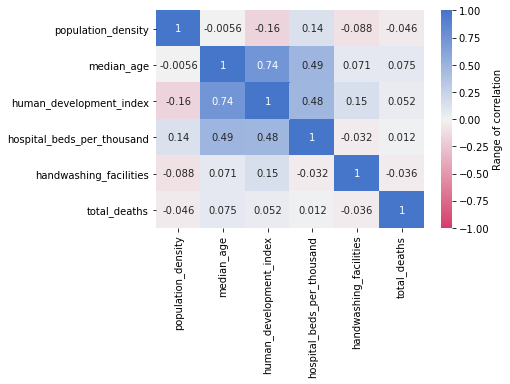

In [18]:
df_corr = data[['location','population_density','median_age', 'human_development_index','hospital_beds_per_thousand','handwashing_facilities', 'total_deaths']].copy()
df_corr.drop(extra, axis=0, inplace = True)
df_corr.total_deaths = df_corr.total_deaths.fillna(method='ffill')
df_corr.fillna(0, inplace = True)
df_corr = df_corr.drop_duplicates(subset = ['location'], keep = 'last')
correlation = df_corr.corr()

cmap = sns.diverging_palette(0, 255, as_cmap=True)
sns.heatmap(correlation, annot = True, cmap=cmap,  vmin=-1, vmax=1, cbar_kws={'label': 'Range of correlation'});

<font color=green size=5 > تحلیل heatmap: </font>

- همانطور كه در نمودار بالا قابل مشاهده مي‌باشد، تاثير ويژگي تراكم جمعيت بر روي تعداد فوتي‌ها يك عدد منفي (0.046-) مي‌باشد كه به اين معنا مي‌باشد كه با افزايش تراكم جمعيت، تعداد فوتي‌ها كاهش مي‌يابد. البته اين correlation عدد خيلي بالايي ندارد (زيرا هرچه قدر مطلق عدد correlation‌به يك نزديك‌تر باشد، ارتباط قوي‌تر خواهد بود) بنابراين  نشان‌دهنده correlation‌ضعيف بين اين دو متغير مي‌باشد.

- تاثير ميانه سن جمعيت بر روي تعداد فوتي‌ها يك عدد مثبت (0.075) است، كه به اين معنا مي‌باشد كه با افزايش ميانه سن، تعداد فوتي‌ها افزايش داشته است. البته اين ارتباط نيز خيلي قوي نمي‌باشد.

- تاثير شاخص پيشرفت انساني بر روي تعداد فوتي‌ها يك عدد مثبت (0.052) است، كه به اين معنا مي‌باشد كه با افزايش شاخص پيشرفت انساني، تعداد فوتي‌ها افزايش داشته است. البته اين ارتباط نيز خيلي قوي نمي‌باشد.

- تاثير تعداد تخت بيمارستان‌ها (اين متغير نشان دهنده تخت‌های بیمارستانی به ازای هر 1000 نفر مي‌باشد، آخرین سال موجود از سال 2010 است.) بر روي تعداد فوتي‌ها يك عدد مثبت (0.012) است، كه به اين معنا مي‌باشد كه با افزايش تعداد تخت بيمارستان‌ها تعداد فوتي‌ها افزايش داشته است. البته اين ارتباط نيز خيلي قوي نمي‌باشد. علت اين ارتباط مثبت را نيز مي‌توان به اين دليل دانست كه شايد چون افراد بيشتري بستري شده‌اند، مرگ بيشتر شده است.

- تاثير وجود امكانات بهداشتي بر روي تعداد فوتي‌ها يك عدد منفي (0.036-) است، كه به اين معنا مي‌باشد كه با افزايش امكانات بهداشتي، تعداد فوتي‌ها كاهش داشته است. البته اين ارتباط نيز خيلي قوي نمي‌باشد.

<hr/>
<font color=red size=5 id="t1"> سوال 2</font>

در ديتاست مورد استفاده، يك سري سطري داريم با location = World كه اطلاعات مربوط به كل چهان را نگه‌داري مي‌كند. اين سطرها را به همراه ستون‌هاي مورد نظر را جدا كرده و تنها سطر آخر آن را ذخيره كرديم، زيرا سطر آخر اطلاعات تا آخرين تاريخ موجود در ديتاست را نشان مي‌دهد. سپس با استفاده از كتابخانه plotly يك bar chart رسم كرده و درصد افرادي كه در جهان يك دز واكسن، دو دز واكسن و دز booster را تزريق كرده‌اند نمايش داده شده‌است. همانطور كه قابل مشاهده مي‌باشد 51% افراد در جهان دز اول، 40% در افراد دز دوم و 0.02% افراد دز booster را تزريق كرده‌اند. 

In [19]:
vacc_information_world = data.loc[(data.location=="World"), ['location','people_vaccinated', 'people_fully_vaccinated', 'total_boosters']]
vacc_information_world = vacc_information_world.drop_duplicates(subset = ['location'], keep = 'last')
vacc_information_world

,location,people_vaccinated,people_fully_vaccinated,total_boosters
130237,World,4.023599e+09,3.136569e+09,139028660.0


In [20]:
var = pd.melt(vacc_information_world)[1:]['variable']
value = pd.melt(vacc_information_world)[1:]['value']


fig_8 = px.bar(y=value, x=var, text=value/7.874966e+09)
fig_8.update_traces(texttemplate='%{text:.2f}%', textposition='outside')
fig_8.update_layout(uniformtext_minsize=8,
                    uniformtext_mode='hide',
                    title="Percentage of people vaccinated, people fully vaccinated and booster in the World",
                    xaxis_title="Type of vaccination",
                    yaxis_title="Count")

fig_8.show()

<hr/>
<font color=red size=5 id="t1"> سوال 3</font>

براي اين سوال نيز مشابه سوال 1 اين بخش، يك ديتافريم جديد با ستون‌هاي مورد نظر ساخته و سطرهاي اضافي(سطرهاي كه داراي اطلاعات مربوط به جهان و ... مي‌باشد) را پاك مي‌كنيم. سپس تعداد فوتي‌هاي هر كشور را بر جمعيت آن تقسيم كرده و در يك ستون جديد به نام 'rate' ذخيره مي‌كنيم و در نهايت اين اطلاعات را مرتب مي‌كنيم تا بتوانيم بهترين و بدترين كشورها را به دست بياوريم. 10 تا از بهترين كشورها و 10 تا از بدترين كشورها به صورت bar chart نمايش داده شده است.
لازم به ذكر است كه هرچه مقدار Rate كمتر باشد، كشور عملكرد بهتري داشته است.

In [21]:
df_2 = data[['location', 'population', 'total_deaths']].copy()
df_2.drop(extra, axis=0, inplace = True)
df_2 = df_2.drop_duplicates(subset = ['location'], keep = 'last', ignore_index = True)
df_2.dropna(inplace = True)
df_2['rate'] = df_2['total_deaths'] / df_2['population']
df_2.sort_values('rate', inplace = True)
best_10 = df_2.head(10)
best_10

,location,population,total_deaths,rate
32,Burundi,1.225543e+07,38.0,0.000003
214,Vanuatu,3.144640e+05,1.0,0.000003
41,China,1.444216e+09,4636.0,0.000003
22,Bhutan,7.799000e+05,3.0,0.000004
142,New Zealand,5.122600e+06,32.0,0.000006
144,Niger,2.513081e+07,221.0,0.000009
31,Burkina Faso,2.149710e+07,221.0,0.000010
39,Chad,1.691498e+07,175.0,0.000010
108,Laos,7.379358e+06,86.0,0.000012
185,South Sudan,1.138138e+07,133.0,0.000012


In [22]:
worst_10 = df_2.tail(10)
worst_10

,location,population,total_deaths,rate
162,Romania,19127772.0,50996.0,0.002666
170,San Marino,34010.0,92.0,0.002705
27,Brazil,213993441.0,609573.0,0.002849
52,Czechia,10724553.0,31053.0,0.002896
89,Hungary,9634162.0,31398.0,0.003259
132,Montenegro,628051.0,2163.0,0.003444
147,North Macedonia,2082661.0,7242.0,0.003477
25,Bosnia and Herzegovina,3263459.0,11840.0,0.003628
30,Bulgaria,6896655.0,25408.0,0.003684
156,Peru,33359415.0,200469.0,0.006009


In [23]:
fig_14 = px.bar(best_10, y='rate' , x='location')
fig_14.update_layout(uniformtext_minsize=8,
                    uniformtext_mode='hide',
                    title="10 countries that have best functionalit in COVID-19",
                    xaxis_title="Country",
                    yaxis_title="Rate")

fig_14.show()

In [24]:
fig_15 = px.bar(worst_10.sort_values(by = "rate", ascending = False), y='rate' , x='location')
fig_15.update_layout(uniformtext_minsize=8,
                    uniformtext_mode='hide',
                    title="10 countries that have worst functionalit in COVID-19",
                    xaxis_title="Country",
                    yaxis_title="Rate")

fig_15.show()

<font color=green size=5 > تحلیل bar plot: </font>

در bar plot اول 10 كشور اولي كه بهترين عملكرد را در كرونا داشتند نمايش داده شده است. همانطور كه مي‌دانيم هرچه اين نرخ كمتر باشد، كشور عملكرد بهترين داشته است. كشورهاي Bernudi، Vanuata و كشور چين، كشورهاي اول تا سوم در بين بهترين كشورها مي‌باشند.

در bar plot دوم 10 كشور اولي كه بدترين عملكرد را در كرونا داشتند نمايش داده شده است. همانطور كه مي‌دانيم هرچه اين نرخ بيشتر باشد، كشور عملكرد بدتري داشته است. كشورهاي پرو، بلغارستان و بوسني كشورهاي اول تا سوم در بين بدترين كشورها مي‌باشند.

<hr/>
<font color=red size=5 id="t1"> سوال 4</font>

به منظور حل اين سوال، 10 كشوري را انتخاب مي‌كنيم كه زودتر واكسيناسيون را شروع كرده‌اند و جمعيت بيشتري را تا به امروز واكسينه كرده‌اند. به عنوان مثال چين، آمريكا، كره جنوبي، ژاپن، ايتاليا، فرانسه، روسیه، كانادا، انگلستان و استراليا. زيرا  طبق گفته‌هاي پزشكي بايد كشورها به پوشش 70% در واكسيناسيون برسند تا همه‌گيري كرونا كاهش و تمام شود.

In [119]:
df_vac_10 = data.loc[(data.location == "China")|(data.location == "Japan")|(data.location == "Italy")|
                     (data.location == "Canada")|(data.location == "France")|(data.location =="India")|
                     (data.location == "South Korea")|(data.location == "United Kingdom")|(data.location == "United States")|
                     (data.location == "Australia"), ['date','location','new_deaths', 'total_vaccinations', 'population']]

df_vac_10['death_scale'] = df_vac_10['new_deaths'] / df_vac_10['population']

df_vac_10.head(5)

,date,location,new_deaths,total_vaccinations,population,death_scale
6780,2020-01-26,Australia,0.0,0.0,25788217.0,0.0
6781,2020-01-27,Australia,0.0,0.0,25788217.0,0.0
6782,2020-01-28,Australia,0.0,0.0,25788217.0,0.0
6783,2020-01-29,Australia,0.0,0.0,25788217.0,0.0
6784,2020-01-30,Australia,0.0,0.0,25788217.0,0.0


In [120]:
fig = px.line(df_vac_10, x='total_vaccinations', y='death_scale', color='location', markers=True)
fig.show()

In [121]:
from plotly.subplots import make_subplots

fig = make_subplots(rows=4, cols=3, subplot_titles=('Australia', 'Canada', 'China', 'France', 'Italy', 'Japan', 'India', 'South Korea', 'United Kingdom', 'United States'))

fig.add_trace(go.Scatter(x=df_vac_10.loc[df_vac_10.location == 'Australia', 'total_vaccinations'], y=df_vac_10.loc[df_vac_10.location == 'Australia', 'death_scale'], name = 'Australia'),
              row=1, col=1)
fig.add_trace(go.Scatter(x=df_vac_10.loc[df_vac_10.location == 'Canada', 'total_vaccinations'], y=df_vac_10.loc[df_vac_10.location == 'Canada', 'death_scale'], name = 'Canada'),
              row=1, col=2)
fig.add_trace(go.Scatter(x=df_vac_10.loc[df_vac_10.location == 'China', 'total_vaccinations'], y=df_vac_10.loc[df_vac_10.location == 'China', 'death_scale'], name = 'China'),
              row=1, col=3)
fig.add_trace(go.Scatter(x=df_vac_10.loc[df_vac_10.location == 'France', 'total_vaccinations'], y=df_vac_10.loc[df_vac_10.location == 'France', 'death_scale'], name = 'France'),
              row=2, col=1)
fig.add_trace(go.Scatter(x=df_vac_10.loc[df_vac_10.location == 'Italy', 'total_vaccinations'], y=df_vac_10.loc[df_vac_10.location == 'Italy', 'death_scale'], name = 'Italy'),
              row=2, col=2)
fig.add_trace(go.Scatter(x=df_vac_10.loc[df_vac_10.location == 'Japan', 'total_vaccinations'], y=df_vac_10.loc[df_vac_10.location == 'Japan', 'death_scale'], name = 'Japan'),
              row=2, col=3)
fig.add_trace(go.Scatter(x=df_vac_10.loc[df_vac_10.location == 'India', 'total_vaccinations'], y=df_vac_10.loc[df_vac_10.location == 'India', 'death_scale'], name = 'India'),
              row=3, col=1)
fig.add_trace(go.Scatter(x=df_vac_10.loc[df_vac_10.location == 'South Korea', 'total_vaccinations'], y=df_vac_10.loc[df_vac_10.location == 'South Korea', 'death_scale'], name = 'South Korea'),
              row=3, col=2)
fig.add_trace(go.Scatter(x=df_vac_10.loc[df_vac_10.location == 'United Kingdom', 'total_vaccinations'], y=df_vac_10.loc[df_vac_10.location == 'United Kingdom', 'death_scale'], name = 'United Kingdom'),
              row=3, col=3)
fig.add_trace(go.Scatter(x=df_vac_10.loc[df_vac_10.location == 'United States', 'total_vaccinations'], y=df_vac_10.loc[df_vac_10.location == 'United States', 'death_scale'], name = 'United States'),
              row=4, col=1)


fig.update_xaxes(title_text="Total vaccination", row=1, col=1)
fig.update_xaxes(title_text="Total vaccination", row=1, col=2)
fig.update_xaxes(title_text="Total vaccination", row=1, col=3)
fig.update_xaxes(title_text="Total vaccination", row=2, col=1)
fig.update_xaxes(title_text="Total vaccination", row=2, col=2)
fig.update_xaxes(title_text="Total vaccination", row=2, col=3)
fig.update_xaxes(title_text="Total vaccination", row=3, col=1)
fig.update_xaxes(title_text="Total vaccination", row=3, col=2)
fig.update_xaxes(title_text="Total vaccination", row=3, col=3)
fig.update_xaxes(title_text="Total vaccination", row=4, col=1)

fig.update_yaxes(title_text="Death", row=1, col=1)
fig.update_yaxes(title_text="Death", row=2, col=1)
fig.update_yaxes(title_text="Death", row=3, col=1)
fig.update_yaxes(title_text="Death", row=4, col=1)

fig.update_layout(title_text="Customizing Subplot Axes", height=1000)

fig.show()

<font color=green size=5 > تحلیل نمودارهاي بالا: </font>

به منظور تاثير واكسيناسيون بر تعداد فوتي‌ها از scatter plot‌استفاده كرديم. در حالت اول تمام 10 كشور را بر روي يك نمودار نشان داديم با استفاده از line plot و در نمودارهاي بعدي هر كشور به طور جداگانه نمايش داده شده است.همانطور كه قابل مشاهده مي‌باشد در اين 10 كشور با افزايش نرخ واكسيانسيون، نرخ مرگ و مير كاهش يافته است. البته اين كاهش ميزان مرگ و مير به يكبار كاهش پيدا نكرده است، زيرا همچنان به پوشش حداكثري در واكسيناسيون نرسيده‌ايم و در پيك‌ها و جهش‌هاي مختلف ويروس ميزان مرگ و مير افزايش پيدا كرده است اما البته اين ميزان افزايش در مقايسه با زمان قبل از واكسيانسيون كمتر است. كشور انگلستان نمونه‌ايي از اين روند مي‌باشد كه با افزايش نرخ واكسيناسيون، نرخ مرگ و مير كاهش يافته است. 

<hr/>
<font color=red size=5 id="t1"> سوال 5</font>

به منظور بررسي وضعيت اقتصادی کشورها از ستون 'extreme_poverty' استفاده کرده‌ایم. این ستون سهم جمعیتی که در فقر شدید زندگی می‌کنند، از سال 2010 تاکنون را به ازای هر کشور نمایش می‌دهد. برای این قسمت نیز مشابه قسمت‌های دیگر ابتدا سطرهای اضافی را حذف کردیم. سپس با استفاده از scatter plot رابطه بین وضعیت اقتصادی کشورها و واکسیناسیون را بررسی کردیم. 
لازم به ذکر می‌باشد که برای 98 کشور از 222 کشور، ستون 'extreme_poverty' مقدار ندارد و نمی‌توانیم آن را با استفاده از سطر و ستون‌های دیگر پر کنیم. به همین دلیل این سطرها را یک بار حذف کرده و نمودار را رسم کردیم و یک بار نیز برابر 0 قرار داده و نمودار را رسم کردیم(البته برابر 0 قرار دادن این خانه‌ها ممکن است باعث نتیجه‌گیری اشتباه شود.)  

In [29]:
df_3 = data[['location','extreme_poverty', 'total_vaccinations', 'population']].copy()
df_3.drop(extra, axis=0, inplace = True)
df_3['total_vaccinations'] = df_3.total_vaccinations.fillna(method = 'ffill')
df_3 = df_3.drop_duplicates(subset = ['location'], keep = 'last', ignore_index = True)
df_new = df_3.copy()
df_3.dropna(inplace = True)
df_3

,location,extreme_poverty,total_vaccinations,population
1,Albania,1.1,1947148.0,2872934.0
2,Algeria,0.5,11271319.0,44616626.0
7,Argentina,0.6,61821032.0,45605823.0
8,Armenia,1.8,709345.0,2968128.0
10,Australia,0.5,36918760.0,25788217.0
...,...,...,...,...
214,Vanuatu,13.2,114912.0,314464.0
217,Vietnam,2.0,89620701.0,98168829.0
219,Yemen,18.8,547019.0,30490639.0
220,Zambia,57.5,871881.0,18920657.0


In [30]:
fig_9 = px.scatter(df_3, x='extreme_poverty', y='total_vaccinations',
                   hover_name='location')


fig_9.add_traces(
    px.scatter(df_3.loc[df_3.location == "Iran", :], x="extreme_poverty", y="total_vaccinations", hover_name='location').update_traces(marker_size=20, marker_color="red").data
)

fig_9.update_layout(title='Correlation between Vaccination and Economic Status (drop NaN values)')
fig_9.show()

In [31]:
df_new.fillna(0, inplace = True)

fig_17 = px.scatter(df_new , x='extreme_poverty', y='total_vaccinations',
                   hover_name='location')


fig_17.add_traces(
    px.scatter(df_new .loc[df_new .location == "Iran", :], x="extreme_poverty", y="total_vaccinations", hover_name='location').update_traces(marker_size=20, marker_color="red").data
)

fig_17.update_layout(title='Correlation between Vaccination and Economic Status (fill NaN values with 0)')
fig_17.show()

<font color=green size=5 > تحلیل نمودار: </font>

همانطور که در صورت سوال خواسته شده بود، کشور ایران به طور متمایزی و با رنگ قرمز و سایز بزرگ‌تر در این نمودار نشان داده شده است. همانطور که در نمودار قابل مشاهده می‌باشد هر چه سهم جمعیتی که در فقر شدید زندگی می‌کنند و به عبارتی وضعیت اقتصادی در کشوری بدتر است، میزان واکسیناسیون در آن پایین‌تر می‌باشد. البته کشوری مانند هند با اینکه تقریبا در سمت راست نمودار قرار می‌گیرد اما واکسیناسیون آن بسیار بالا بوده است که البته جمعیت آن نیز زیاد است. کشور چین نیز با وضعیت اقتصادی خوب، بالاترین تعداد واکسیناسیون را دارد.

<hr/>
<font color=red size=5 id="t1"> سوال 6</font>

برای به دست آوردن تعداد فوتی‌های شش ماه اخیر، ما تعداد فوتی‌ها را از تاریخ  ```08-05-2021``` تا ```08-11-2021``` که آخرین تاریخ موجود در دیتاست می‌باشد، در نظر گرفته‌ایم. همچنین سطرهای اضافی را نیز مشابه بخش‌های قبلی حذف نمودیم. مقادیر NaN در ستون new_deaths_smoothed را نیز به ازاي هر كشور با تابع ```()fillna``` و با استفاده از روش ```ffill``` پر نموديم. 

In [43]:
ext = data.loc[(data.date > '2021-05-07') & (data.iso_code.str.contains('^OWID_')), :].index 

In [64]:
population = data.loc[(data.date > '2021-05-07'),['location', 'population']]
population.drop(ext, axis=0, inplace = True)
population = population.drop_duplicates(subset = ['location'], keep = 'last', ignore_index = True)


df_4 = data.loc[(data.date > '2021-05-07'), ['iso_code','location', 'new_deaths_smoothed']]
df_4.drop(ext, axis=0, inplace = True)

for cntry in df_4.location.unique():

    df_4.loc[df_4.location == cntry, ['new_deaths_smoothed']] = df_4.loc[df_4.location == cntry, ['new_deaths_smoothed']].fillna(method = 'ffill')

df_4 = df_4.groupby(by = ["location", 'iso_code'], as_index=False).new_deaths_smoothed.sum()
df_4['population'] = population['population']
df_4['rate'] = df_4['new_deaths_smoothed'] /df_4['population']
df_4.head(5)

,location,iso_code,new_deaths_smoothed,population,rate
0,Afghanistan,AFG,4634.278,39835428.0,0.000116
1,Albania,ALB,546.716,2872934.0,0.000190
2,Algeria,DZA,2649.715,44616626.0,0.000059
3,Andorra,AND,3.289,77354.0,0.000043
4,Angola,AGO,1106.285,33933611.0,0.000033


In [65]:
fig_20 = px.choropleth(df_4, locations='iso_code' ,
                       color="rate", 
                       hover_name="location", 
                       )

fig_20.update_layout(
        title = 'Death rate in the world in the last six months',
        coloraxis_colorbar=dict(
        title="Death rate",
    )
)
fig_20.show()

<font color=green size=5 > تحلیل:</font>

همانطور كه در نمودار بالا قابل مشاهده مي‌باشد، هر چه رنگ كشورها به سمت زرد مي‌رود نرخ فوتي‌ها در شش ماه اخير در آن كشور بيشتر بوده است و هرچه به سمت بنفش مي‌رويم، نرخ فوتي‌ها در شش ماه گذشته در آن كشور كمتر بوده است. كشورهاي موجود در آمريكا جنوبي؛ ايالت متحده، روسيه، جنوب آفريقا، ايران و چندين كشور ديگر در اين شش ماه نرخ فوتي بيشتري داشته‌اند. همچنين لازم به ذكر است كه ماكزيمم نرخ فوتي برابر 0.0016 مي‌باشد كه بسيار نرخ كمي است.

<hr/>
<font color=red size=5 id="t1"> سوال 7</font>

برای به دست آوردن تعداد واكسيناسيون شش ماه اخیر، ما تعداد واكسيناسيون را از تاریخ  ```08-05-2021``` تا ```08-11-2021``` که آخرین تاریخ موجود در دیتاست می‌باشد، در نظر گرفته‌ایم. همچنین سطرهای اضافی را نیز مشابه بخش‌های قبلی حذف نمودیم. مقادیر NaN در ستون new_vaccinations_smoothed را نیز به ازاي هر كشور با تابع ```()fillna``` و با استفاده از روش ```ffill``` پر نموديم.

In [69]:
df_5 = data.loc[(data.date > '2021-05-07'), ['iso_code','location', 'new_vaccinations_smoothed']]
df_5.drop(ext, axis=0, inplace = True)

for cntry in data.location.unique():

    df_5.loc[df_5.location == cntry, ['new_vaccinations_smoothed']] = df_5.loc[df_5.location == cntry, ['new_vaccinations_smoothed']].fillna(method = 'ffill')
    



df_5 = df_5.groupby(by = ["location", 'iso_code'], as_index=False).new_vaccinations_smoothed.sum()
df_5['population'] = population['population']
df_5['rate'] = df_5['new_vaccinations_smoothed'] / (2 * df_5['population'])

df_5.head(5)

,location,iso_code,new_vaccinations_smoothed,population,rate
0,Afghanistan,AFG,5545281.0,39835428.0,0.069602
1,Albania,ALB,1398374.0,2872934.0,0.243370
2,Algeria,DZA,9591131.0,44616626.0,0.107484
3,Andorra,AND,76358.0,77354.0,0.493562
4,Angola,AGO,6445209.0,33933611.0,0.094968


In [70]:
fig_11 = px.choropleth(df_5, locations='iso_code' ,
                       color="rate", 
                       hover_name="location",
                       hover_data=["population"], 
                       )
fig_11.update_layout(
        title = 'Vaccination rate in the world in the last six months',
        coloraxis_colorbar=dict(
        title="Vaccination rate",
    )
)
fig_11.show()

<font color=green size=5 > تحلیل:</font>

همانطور كه در نمودار بالا قابل مشاهده مي‌باشد، هر چه رنگ كشورها به سمت زرد مي‌رود واكسيناسيون در شش ماه اخير در آن كشور بيشتر بوده است و هرچه به سمت بنفش مي‌رويم، نرخ واكسيناسيون در شش ماه گذشته در آن كشور كمتر بوده است. كشورهاي موجود در آفريقا نسبتبه بقيه كشورها كمترين نرخ واكسيناسيون در شش ماه اخير را داشته‌اند.
البته لازم به ذكر است كه تعداد واكسيناسيون نسبت به جميعت كار چندان درستي نمي‌باشد، زيرا هر فرد در يك كشور دو دز يا حتي دز booster را تزريق مي‌كند و بنابراين تعداد واكسيانسيون بيشتر از تعداد جمعيت كشورها خواهد بود.به همين دليل ما جمعيت هر كشور را دو برابر كرده و تعداد واكسيناسيون را بر آن تقسيم كرديم. البته مناسب‌تر است كه تعداد واكسيناسيون دز اول و دز دوم در هر كشور را جدا جدا نسبت به جمعيت حساب كرده و روي نقشه نمايش دهيم. ما اين كار را نيز انجام داديم و خروجي آن به شرح زير مي‌باشد.

In [87]:
vac_one_two = data.loc[(data.date > '2021-05-07'), ['iso_code','location', 'people_vaccinated', 'people_fully_vaccinated']]
vac_one_two.drop(ext, axis=0, inplace = True)
for cntry in vac_one_two.location.unique():

    vac_one_two.loc[vac_one_two.location == cntry, ['people_vaccinated']] = vac_one_two.loc[vac_one_two.location == cntry, ['people_vaccinated']].interpolate(method = 'linear')
    vac_one_two.loc[vac_one_two.location == cntry, ['people_fully_vaccinated']] = vac_one_two.loc[vac_one_two.location == cntry, ['people_fully_vaccinated']].interpolate(method = 'linear')
    
vac_one_two = vac_one_two.drop_duplicates(subset = ['location'], keep = 'last', ignore_index = True)
vac_one_two['population'] = population['population']
vac_one_two['rate_one'] = vac_one_two['people_vaccinated'] / vac_one_two['population']
vac_one_two['rate_two'] = vac_one_two['people_fully_vaccinated'] /vac_one_two['population']

vac_one_two.head(5)

,iso_code,location,people_vaccinated,people_fully_vaccinated,population,rate_one,rate_two
0,AFG,Afghanistan,3097293.0,2755517.0,39835428.0,0.077752,0.069173
1,ALB,Albania,1032457.0,905876.0,2872934.0,0.359374,0.315314
2,DZA,Algeria,6399209.0,4872110.0,44616626.0,0.143427,0.109199
3,AND,Andorra,54383.0,48309.0,77354.0,0.703041,0.624518
4,AGO,Angola,5269623.0,1977343.0,33933611.0,0.155292,0.058271


In [90]:
fig_40 = px.choropleth(vac_one_two , locations='iso_code' ,
                       color="rate_one", 
                       hover_name="location",
                       hover_data=["population"], 
                       )
fig_40.update_layout(
        title = 'Vaccination(1 dose) rate in the world in the last six months',
        coloraxis_colorbar=dict(
        title="Vaccination rate",
    )
)
fig_40.show()

In [91]:
fig_40 = px.choropleth(vac_one_two , locations='iso_code' ,
                       color="rate_two", 
                       hover_name="location",
                       hover_data=["population"], 
                       )
fig_40.update_layout(
        title = 'Vaccination(2 doses) rate in the world in the last six months',
        coloraxis_colorbar=dict(
        title="Vaccination rate",
    )
)
fig_40.show()

<font color=green size=5 > تحلیل:</font>

همانطور كه در بالا گفته شد، اين دو نمودار نرخ يك دز واكسن زده شده در كشورها در شش ماه گذشته ونيز نرخ دو دز واكسن زده شده در كشورها را در شش ماه گذشته نمايش مي‌دهد. كشورهاي موجود در آفريقا نسبتبه بقيه كشورها كمترين نرخ واكسيناسيون در شش ماه اخير را داشته‌اند. 

<hr/>
<font color=red size=5 id="t1"> سوال 8</font>

براي اين قسمت ابتدا دو نمودار بالا را با استفاده از scatter plot بر روي نقشه نمايش مي‌دهيم تا بتوانيم اين دو نمودار را باهم مقايسه كنيم.

In [95]:
df_4.dropna(inplace = True)
fig_12 = px.scatter_geo(df_4, locations="iso_code",
                     color = 'rate',
                     size = 'rate',
                     hover_name = 'location'
                     )
fig_12.show()

In [96]:
df_5.dropna(inplace = True)
fig_13 = px.scatter_geo(df_5, locations="iso_code",
                     color = 'rate',
                     size = 'rate',
                     hover_name = 'location'
                     )
fig_13.show()

باتوجه به نمودارهاي بالا و سوال‌ قبل، مشاهده مي‌كنيم كه استفاده از coropleth map در چنين مواقعي مناسب تر از scatter plot مي‌باشد، زيرا باتوجه به اينكه تعداد كشورهاي زياد است، استفاده از scatterplot باعث عدم خوانايي درست مي‌شود. همچنين تحليل را سخت و دشوار مي‌كند. اما همانطور كه در نمودارهاي سوال 7 و 8 مشاهده مي‌كنيم، نرخ واكسيناسيون و فوتي‌ها را راحت‌تر و سريع‌تر مي‌توان مقايسه كرد. استفاده از scatter plot بر روي نقشه بيشتر در مواقعي مي‌تواند قابل استفاده باشد كه به عنوان مثال مي‌خواهيم شهرهاي موجود در يك كشور را بررسي كنيم، زيرا در اين صورت نقطه‌ها رو هم افتادگي ندارند و مجزا هستند و تجزيه و تحليل مانند حالت قبل دشوار نيست. همچنين همانطور كه قابل مشاهده مي‌باشد تخيص مناطق نيز براي خوانندگان سخت خواهد بود.
نقشه های Choropleth برای نشان دادن الگوی منطقه‌ای واضح در داده‌ها یا برای داده‌های محلی عالی هستند. الگوهای منطقه‌ای می‌تواند نرخ بالای بیکاری غیرمعمول در شهرستان‌های همسایه یا تضاد بین شهرها و مناطق روستایی باشد. اگر داده‌ها الگوی منطقه‌ای واضحی را نشان نمی‌دهند،استفاده از اين نمودار مناسب نخواهد بود. 
نقشه‌های Choropleth برای دیدن تصویر بزرگ عالی هستند، اما نه برای تفاوت‌های ظریف. خوانندگان برای درک تفاوت‌های کوچک بین رنگ‌ها در نقشه مشکل خواهند داشت. علاوه بر این، فواصل بین رنگ‌ها لزوماً همان فواصل بین مقادیر موجود در داده‌های شما نیست. این امر تشخیص الگوها در نقشه را آسان‌تر می‌کند، اما مقایسه مقادیر دقیق مناطق با یکدیگر را دشوارتر می‌کند. اگر بخواهيم به تفاوت‌های عددی بین مناطق اشاره کنیم، به جای آن، بايد نوع نمودار دیگری، جدول یا متن را در نظر بگیريم.


<hr/>

# بخش سوم – نتیجه گیری کلی و تحلیل

<font color=red size=5 id="t1"> سوال 1</font>

براي حل اين سوال ازديتاست مورد استفاده، سطرهايي كه مربوط به جهان (World) مي‌باشند به همراه ستون‌هاي مورد نظر استخراج كرديم.

In [140]:
world_df = data.loc[(data.location=="World"), ['date','people_vaccinated', 'people_fully_vaccinated', 'total_vaccinations', 'new_vaccinations_smoothed', "total_deaths", 'new_deaths_smoothed', 'total_cases', 'new_cases_smoothed', 'new_vaccinations']]
world_df.fillna(method = 'ffill', inplace = True)
world_df.head(5)

,date,people_vaccinated,people_fully_vaccinated,total_vaccinations,new_vaccinations_smoothed,total_deaths,new_deaths_smoothed,total_cases,new_cases_smoothed,new_vaccinations
129581,2020-01-22,0.0,0.0,0.0,0.0,17.0,0.0,557.0,0.0,0.0
129582,2020-01-23,0.0,0.0,0.0,0.0,18.0,0.0,655.0,0.0,0.0
129583,2020-01-24,0.0,0.0,0.0,0.0,26.0,0.0,941.0,0.0,0.0
129584,2020-01-25,0.0,0.0,0.0,0.0,42.0,0.0,1434.0,0.0,0.0
129585,2020-01-26,0.0,0.0,0.0,0.0,56.0,0.0,2118.0,0.0,0.0


In [177]:
world_df['date'] = pd.to_datetime(world_df['date']) - pd.to_timedelta(7, unit='d')
wr_df = world_df.groupby([pd.Grouper(key='date', freq='M')])['new_cases_smoothed', 'new_deaths_smoothed', 'new_vaccinations_smoothed'].sum().reset_index()

<ipython-input-177-c73740089da7>:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [134]:
fig = px.line(world_df , x='total_vaccinations', y='new_deaths_smoothed', markers=True)

fig.update_layout(title='Correlation between total vaccinations and deaths ',
                   xaxis_title='Total vaccinations',
                   yaxis_title='Deaths per day')

fig.show()

در نمودار بالا كه رابطه بين واكسيناسيون و آمار مرگ و مير در جهان را نمايش مي‌دهد، مشاهده مي‌كنيم كه با افزايش واكسيناسيون تعداد مرگ و مير روزانه در جهان كاهش يافته است. البته اين روند كاهشي يكبار و سريع اتفاق نمي‌افتد چون همانطور كه مي‌دانيم ويروس در طول اين مدت جهش‌هايي داشته و نيز همچنان خيلي از افراد جهان واكسن نزده‌اند تا بتوانيم به پوشش حداكثري واكسيناسيون بريم. طبق نمودار سوال 2 در بخش دوم، تنها 50 درصد افراد واكسينه شده‌اند كه البته فقط دز اول را دريافت كرده‌اند و 40 درصد دز دوم كه تا پوشش 70 درصدي خيلي فاصله داريم. همچنين قابل مشاهده مي‌باشد كه باتوجه به پيك‌هايي كه در تعداد مرگ و مير روزانه داشتيم، اما هرچه نرخ واكسيناسيون بيشتر شده است اندازه اين پيك‌ها كمتر شده است.

<hr/>

In [135]:
fig = px.line(world_df , x='total_vaccinations', y='new_cases_smoothed', markers=True)

fig.update_layout(title='Correlation between total vaccinations and cases',
                   xaxis_title='Total vaccinations',
                   yaxis_title='Cases per day')

fig.show()

در نمودار بالا نيز كه رابطه بين واكسيناسيون و تعدا مبتلايان روزانه در جهان را نمايش مي‌دهد، مشاهده مي‌كنيم كه با افزايش واكسيناسيون تعداد مبتلايان روزانه در جهان كاهش يافته است. البته اين روند كاهشي يكبار و سريع اتفاق نمي‌افتد چون همانطور كه مي‌دانيم ويروس در طول اين مدت جهش‌هايي داشته و نيز همچنان خيلي از افراد جهان واكسن نزده‌اند تا بتوانيم به پوشش حداكثري واكسيناسيون بريم. طبق نمودار سوال 2 در بخش دوم، تنها 50 درصد افراد واكسينه شده‌اند كه البته فقط دز اول را دريافت كرده‌اند و 40 درصد دز دوم كه تا پوشش 70 درصدي خيلي فاصله داريم. همچنين قابل مشاهده مي‌باشد كه باتوجه به پيك‌هايي كه در تعداد مبتلايان روزانه داشتيم، اما هرچه نرخ واكسيناسيون بيشتر شده است اندازه اين پيك‌ها كمتر شده است. البته كاهش اين اندازه در تعداد مرگ و مير روزانه خيلي بيشتر قابل مشاهده مي‌باشد. زيرا طبق گفته سازمان بهداشت جهاني و شركت‌هاي سازنده واكسن، واكسيناسيون از مرگ جلوگيري كرده، اما ممكن است افراد مبتلا به كرونا شوند و به طور خيلي خفيف.
ظبق نمودارهاي بالا جمعيت واكسيانسيون موثر بيشتر از 3.5B در جهان خواهد بود و باتوجه با نمودارهاي بالا و دو نمودار پايين(نشان دهنده تعداد مبتلايان و فوتي‌ها و واكسيناسيون در جهان به صورت ماهانه مي‌باشد) هر چه سرعت واكسيناسيون بيشتر باشد، روند موثر بودن واكسيانسيون بيشتر خواهد بود.

In [174]:
fig_wr = go.Figure()
fig_wr.add_trace(go.Scatter(x=wr_df.date, y=wr_df.new_deaths_smoothed,
                    mode='lines',
                    name='death'))
fig_wr.add_trace(go.Scatter(x=wr_df.date, y=wr_df.new_cases_smoothed,
                    mode='lines',
                    name='cases'))
fig_wr.add_trace(go.Scatter(x=wr_df.date, y=wr_df.new_vaccinations_smoothed,
                    mode='lines', name='vaccination'))


fig_wr.update_layout(
    title='Number of cases and deaths and vaccination per Month',
    xaxis = dict(
        title='Date(Month)',
        titlefont_size=16,
        tickfont_size=12,
        nticks=23,
        
    ),
    yaxis=dict(
        title='Number',
        titlefont_size=16,
        tickfont_size=14,
        showgrid=False
    )
)


fig_wr.show()

In [176]:
fig_wr2 = go.Figure()
fig_wr2.add_trace(go.Scatter(x=wr_df.date, y=wr_df.new_deaths_smoothed,
                    mode='lines',
                    name='death'))
fig_wr2.add_trace(go.Scatter(x=wr_df.date, y=wr_df.new_cases_smoothed,
                    mode='lines',
                    name='cases'))

fig_wr2.update_layout(
    title='Number of cases and deaths and vaccination per Month',
    xaxis = dict(
        title='Date(Month)',
        titlefont_size=16,
        tickfont_size=12,
        nticks=23,
        
    ),
    yaxis=dict(
        title='Number',
        titlefont_size=16,
        tickfont_size=14,
        showgrid=False
    )
)


fig_wr2.show()

<hr/>
<font color=red size=5 id="t1"> سوال 2</font>

In [145]:
# Create traces
fig = go.Figure()

fig.add_trace(go.Scatter(x=df.date, y=df.new_cases,
                    mode='lines',
                    name='cases'))


fig.update_layout(
    title='Number of cases per week',
    xaxis = dict(
        title='Date(Month)',
        titlefont_size=16,
        tickfont_size=12,
        nticks=23,
        calendar='persian'
        
    ),
    yaxis=dict(
        title='Number',
        titlefont_size=16,
        tickfont_size=14,
        showgrid=False
    )
)

fig.show()

In [146]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=df.date, y=df.new_vaccinations,
                    mode='lines',
                    name='cases'))


fig.update_layout(
    title='Number of cases per week',
    xaxis = dict(
        title='Date(Month)',
        titlefont_size=16,
        tickfont_size=12,
        nticks=23,
        calendar='persian'
        
    ),
    yaxis=dict(
        title='Number',
        titlefont_size=16,
        tickfont_size=14,
        showgrid=False
    )
)

fig.show()

In [164]:
ir = df_ir.copy()
ir.people_vaccinated.fillna(method = "ffill", inplace = True)
ir.people_fully_vaccinated.fillna(method = "ffill", inplace = True)
one_doses_ir = ir['people_vaccinated'].sum()/ df_ir['population'].unique()
two_doses_ir = ir['people_fully_vaccinated'].sum()/ df_ir['population'].unique()
mydict = {'doses' : ['one', 'two'], 'percent': [one_doses_ir, two_doses_ir]}
per_vacc = pd.DataFrame(mydict)
per_vacc['percent'] = per_vacc['percent'].astype(float)
per_vacc

,doses,percent
0,one,39.861871
1,two,18.824515


In [168]:
fig_ir = px.bar(per_vacc, y='percent', x='doses', text='percent')
fig_ir.update_traces(texttemplate='%{text:.2f}%', textposition='outside')
fig_ir.update_layout(uniformtext_minsize=8,
                    uniformtext_mode='hide',
                    title="Percentage of people vaccinated, people fully vaccinated in Iran",
                    xaxis_title="Type of vaccination",
                    yaxis_title="Count")

fig_ir.show()

باتوجه به نمودار هفتگي ابتلا به كرونا در ايران و نيز نمودار هفتگي واكسيناسيون و نيز درصد واكسيناسيون در ايران، احتمال موج بعدي وجود دارد، اما با اين تفاوت كه به احتمال خيلي زياد اندازه موج كمتر از موج قبلي باشد، به عبارتي نرخ مبتلا و نرخ مرگ و مير كمتر موج‌هاي قبلي خواهد بود. شروع موج بعدي نيز احتمالا از اوايل يا اواسط آذر خواهد بود.